Epoch 1/100


c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0368 - loss: 3.4593 - val_accuracy: 0.0546 - val_loss: 3.3999
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0412 - loss: 3.4016 - val_accuracy: 0.0799 - val_loss: 3.3157
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0873 - loss: 3.2657 - val_accuracy: 0.0721 - val_loss: 3.1973
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1029 - loss: 3.1591 - val_accuracy: 0.0585 - val_loss: 3.1756
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0919 - loss: 3.2128 - val_accuracy: 0.0819 - val_loss: 3.0685
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0906 - loss: 3.0955 - val_accuracy: 0.0702 - val_loss: 3.2666
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0739 - loss: 3.2071 - val_accuracy: 0.0624 - val_loss: 3.1554
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1104 - loss: 3.0575 - val_accuracy: 0.0858 - val_loss: 2.9

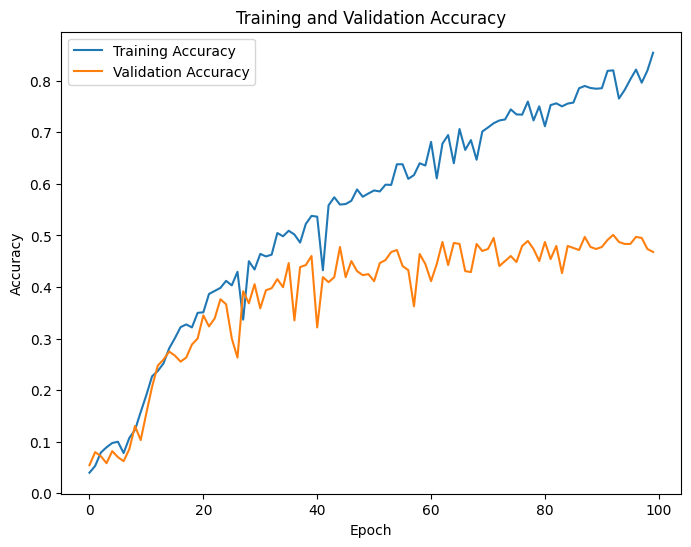

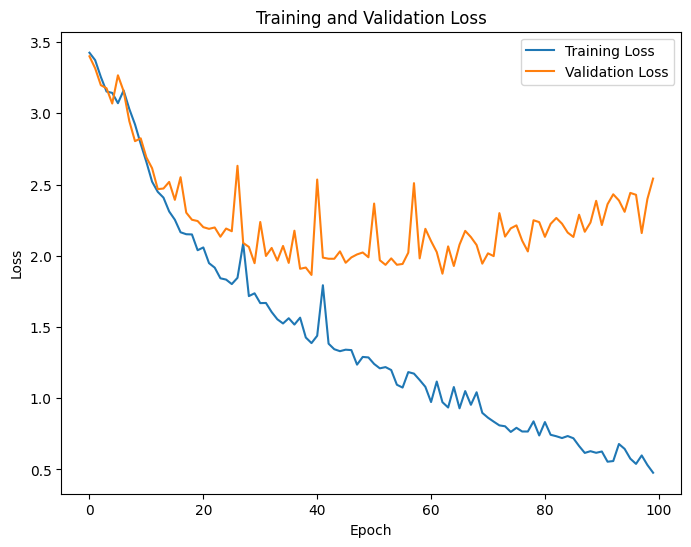

Training Accuracy: 0.8224
Testing Accuracy: 0.4678
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


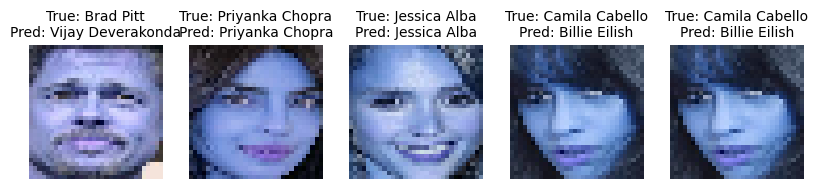

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

def load_and_preprocess_images(file_path, image_size=(32, 32)):
    labels = []
    imgs = []
    for image_path in glob.glob(file_path):
        label = image_path.split('_')[-2].split('\\')[-1]  # Adjusted for cross-platform compatibility
        labels.append(label)
        img = cv2.imread(image_path)
        img = cv2.resize(img, image_size) / 255.0
        imgs.append(img)
    return np.array(imgs), labels

def encode_labels(labels):
    lb = LabelBinarizer()
    return lb, lb.fit_transform(labels)

def create_model(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def plot_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def display_predictions(X_test, y_test, model, lb, num_examples=5):
    fig, axes = plt.subplots(nrows=1, ncols=num_examples, figsize=(num_examples * 2, 2))
    for i in range(num_examples):
        idx = np.random.randint(0, len(X_test))
        img = X_test[idx]
        label = lb.classes_[np.argmax(y_test[idx])]
        pred = lb.classes_[np.argmax(model.predict(np.expand_dims(img, axis=0)))]
        axes[i].imshow(img)
        axes[i].set_title(f'True: {label}\nPred: {pred}', fontsize=10)
        axes[i].axis('off')
    plt.show()

def display_accuracy(model, X_train, y_train, X_test, y_test):
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Training Accuracy: {train_acc:.4f}')
    print(f'Testing Accuracy: {test_acc:.4f}')

# Main execution
file_path = "./Dataset/Faces/Faces/*"
imgs, labels = load_and_preprocess_images(file_path)
lb, labels_onehot = encode_labels(labels)
X_train, X_test, y_train, y_test = train_test_split(imgs, labels_onehot, test_size=0.2, random_state=42)
model = create_model(input_shape=(32, 32, 3), num_classes=len(lb.classes_))
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
plot_history(history)
display_accuracy(model, X_train, y_train, X_test, y_test)
display_predictions(X_test, y_test, model, lb)
